In [1]:
import numpy as np
import pandas as pd
import time
import csv
import matplotlib.pyplot as plt

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.alert import Alert
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [4]:
with open("etfs.txt") as f:
    li = f.read().splitlines()
print(li)

['SPY', 'IVV', 'VTI', 'VOO', 'QQQ', 'VEA', 'IEFA', 'AGG', 'IEMG', 'VWO', 'VTV', 'VUG', 'BND', 'IJR', 'IWM', 'IWF', 'IJH', 'VIG', 'GLD', 'EFA', 'IWD', 'VO', 'VGT', 'VB', 'VXUS', 'VCIT', 'LQD', 'XLK', 'BNDX', 'XLF', 'VCSH', 'ITOT', 'VNQ', 'VYM', 'IVW', 'VEU', 'BSV', 'EEM', 'DIA', 'SCHX', 'USMV', 'IWB', 'IWR', 'IAU', 'IXUS', 'TIP', 'SCHF', 'MBB', 'RSP', 'XLV', 'ARKK', 'IGSB', 'VV', 'VBR', 'HYG', 'XLE', 'SCHD', 'IVE', 'MUB', 'MDY', 'XLY', 'XLI', 'QUAL', 'SCHB', 'VT', 'SHY', 'PFF', 'SDY', 'EMB', 'DGRO', 'DVY', 'SCHP', 'JPST', 'ESGU', 'ACWI', 'IWN', 'VGK', 'VXF', 'IWP', 'VBK', 'SCHA', 'SHV', 'MTUM', 'MINT', 'GOVT', 'SCHG', 'IEF', 'SLV', 'BIV', 'GDX', 'VLUE', 'TLT', 'SCZ', 'VHT', 'VMBS', 'VOE', 'IWS', 'XLC', 'EWJ', 'GSLC']


In [5]:
li = ['SPY', 'IVV', 'VTI', 'VOO', 'QQQ', 'VEA', 'IEFA', 'AGG', 'IEMG', 'VWO', 'VTV', 'VUG', 'BND', 'IJR', 'IWM', 'IWF', 'IJH', 'VIG', 'GLD', 'EFA', 'IWD', 'VO', 'VGT', 'VB', 'VXUS', 'VCIT', 'LQD', 'XLK', 'BNDX', 'XLF', 'VCSH', 'ITOT']

In [6]:
# Seleniumをあらゆる環境で起動させるChromeオプション
options = Options()
options.add_argument('--disable-gpu');
options.add_argument('--disable-extensions');
options.add_argument('--proxy-server="direct://"');
options.add_argument('--proxy-bypass-list=*');
options.add_argument('--start-maximized');
# options.add_argument('--headless'); # ※ヘッドレスモードを使用する場合、コメントアウトを外す

In [7]:
len(li)

32

In [8]:
DRIVER_PATH = '../chromedriver.exe'
# DRIVER_PATH = '/Users/Kenta/Desktop/Selenium/chromedriver' # ローカル
# DRIVER_PATH = '/app/.chromedriver/bin/chromedriver'        # heroku

# ブラウザの起動
driver = webdriver.Chrome(executable_path=DRIVER_PATH, chrome_options=options)

C:\Users\Takumi Inui\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


In [9]:
# Selenium 経由でブラウザを操作する
url = 'https://fintel.io/ss/us/' + li[0]
driver.get(url)

In [10]:
import datetime 
tm = datetime.datetime.now()
tm = tm - datetime.timedelta(minutes=tm.minute % 10,seconds=tm.second,microseconds=tm.microsecond)
print(tm)

2021-06-18 13:40:00


In [16]:
def main(x):
    url = 'https://fintel.io/ss/us/' + x
    driver.get(url)
        
    source = driver.page_source
    soup = BeautifulSoup(source, "html.parser") 
    y = soup.find_all("div", class_ = "card-body")
    data = []
    for i in y:
        a = i.find("h5",class_ = "card-title")
        if a != None:
            if a.get_text() == "Short Volume":
                b = i.find("tbody")
                c = b.find_all("tr")
                for j in c:
                    d = j.find_all("td")
                    e = [d[0].get_text(),d[1].get_text(),d[2].get_text().split("\n")[1],d[3].get_text().split("\n")[1]]
                    data.append(e)
                with open( "../datas/etf_data/csv/"+ x +".csv" ,"a",newline="") as f:
                    writer = csv.writer(f)
                    for i in reversed(data):
                        writer.writerow(i)
    time.sleep(20)

In [17]:
main("SPY")

In [18]:
for i in li:
    main(i)

In [23]:
driver.close()

In [19]:
def f1(x):
    return int(x.replace(",", "")) / (10 ** 6)

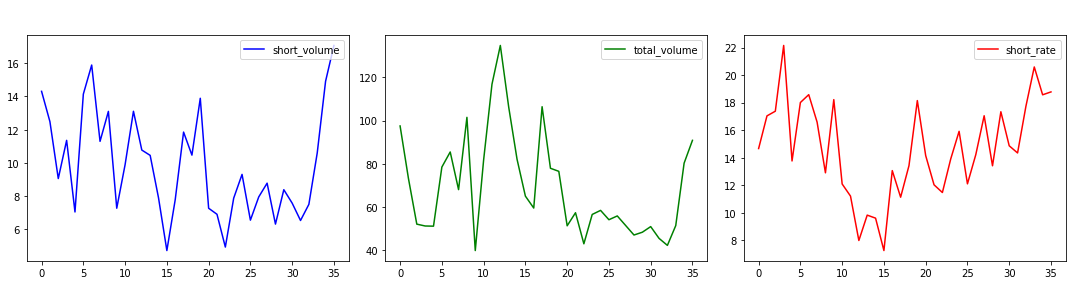

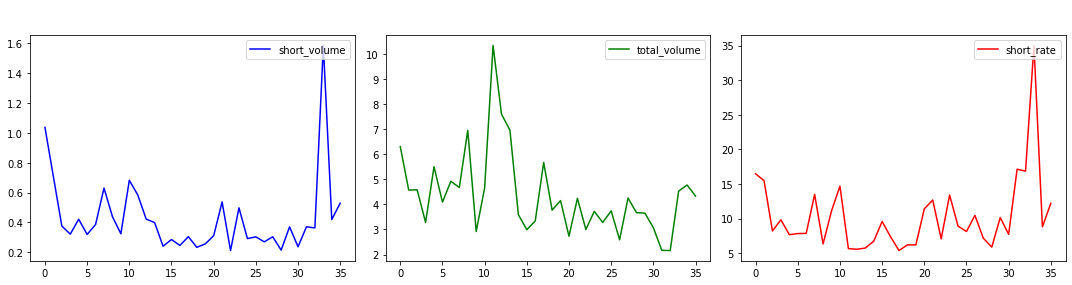

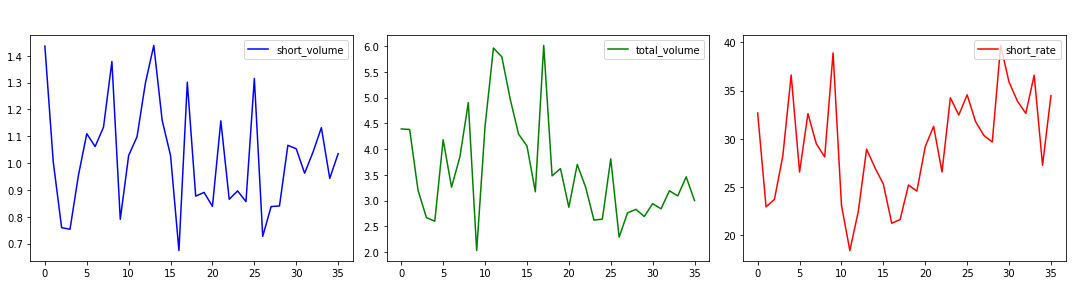

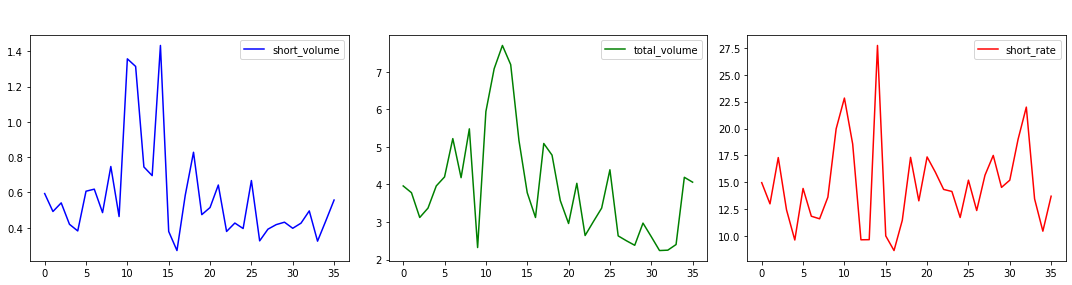

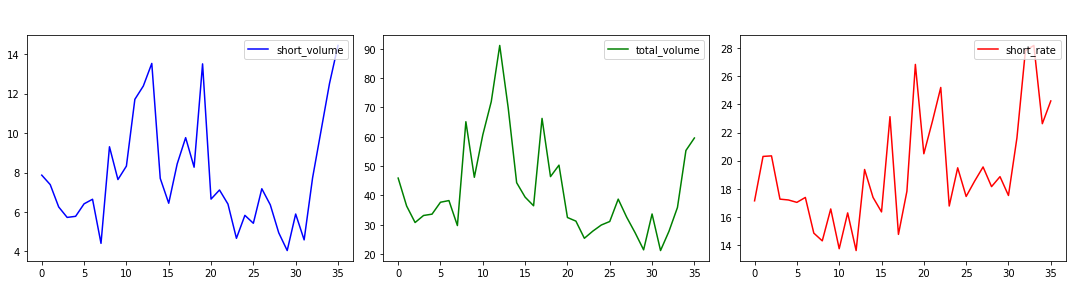

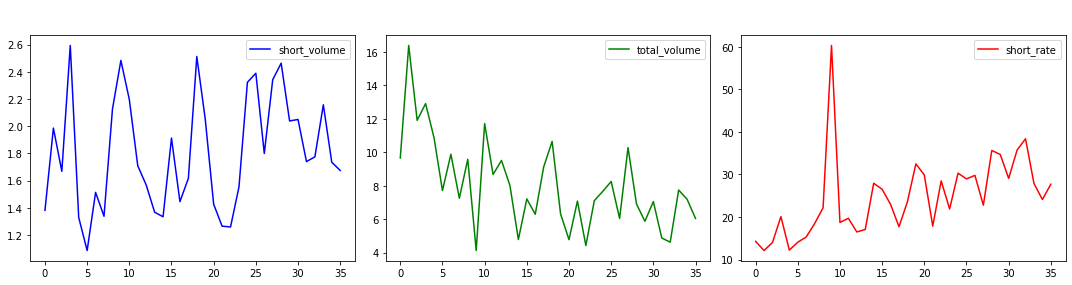

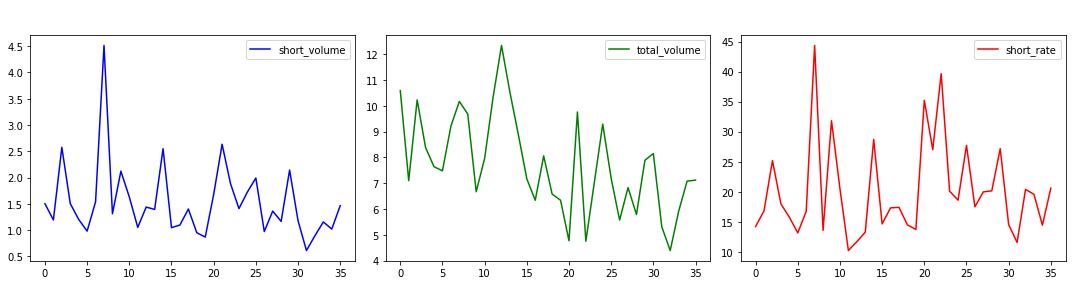

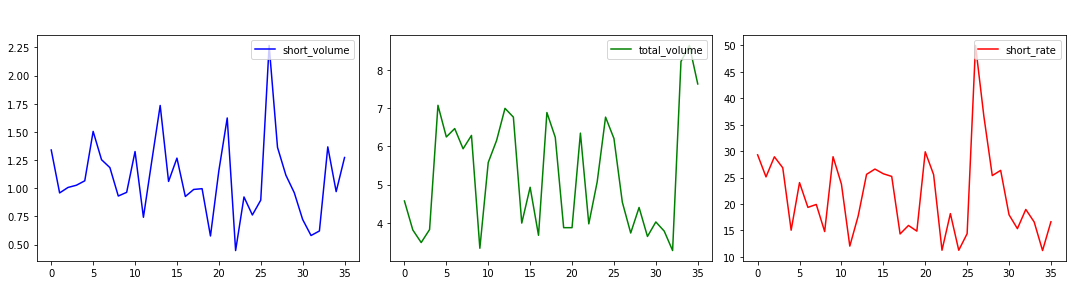

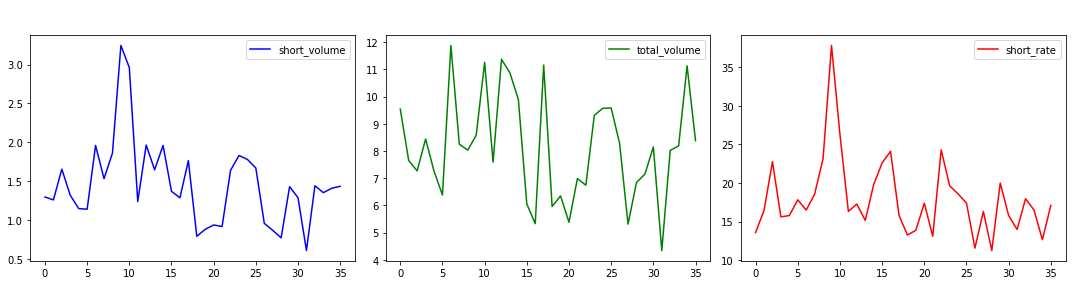

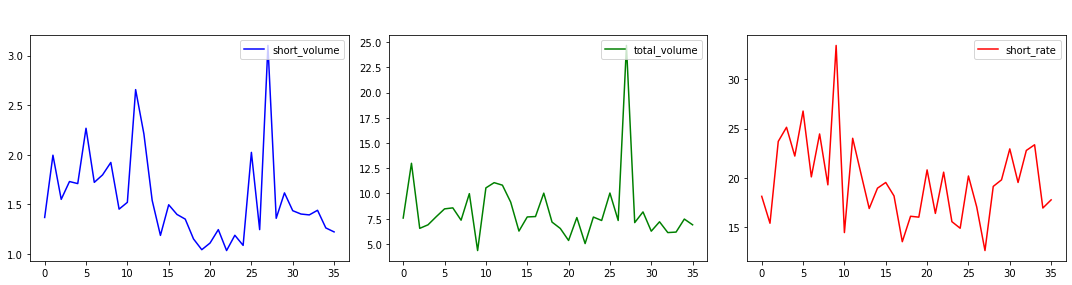

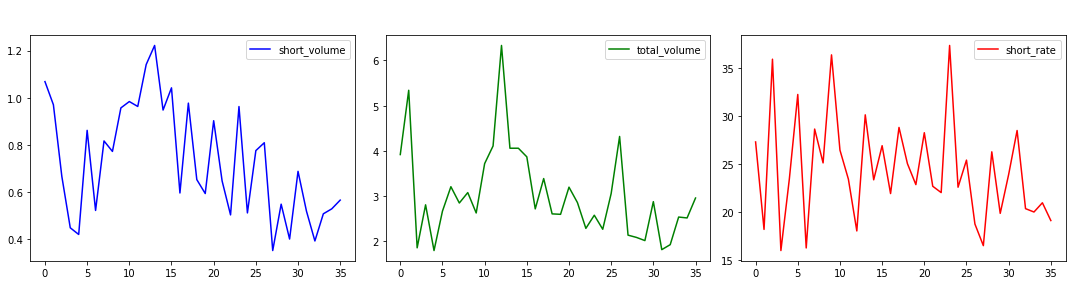

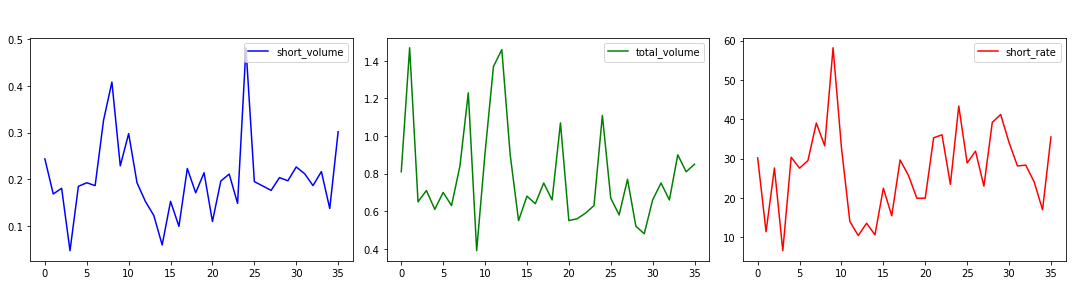

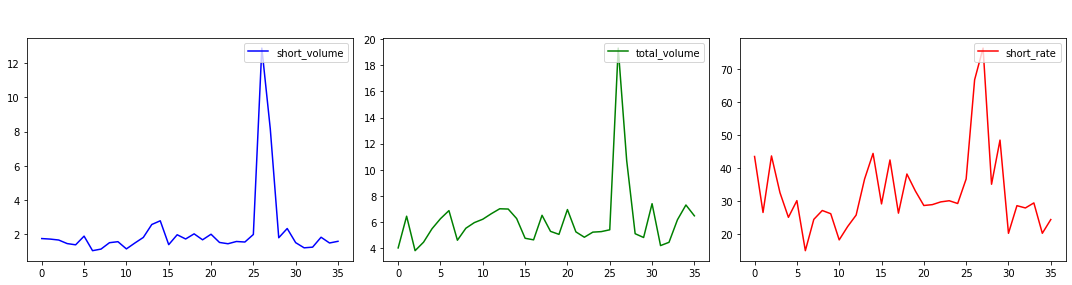

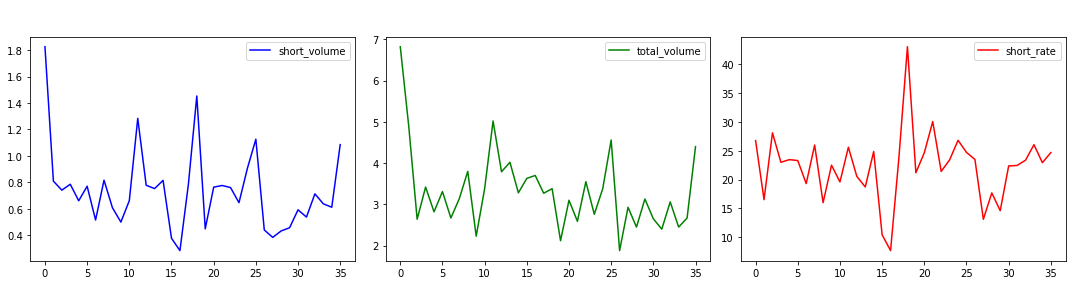

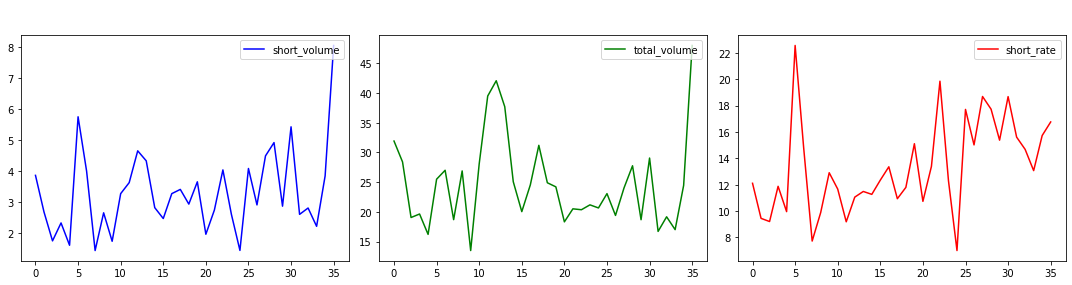

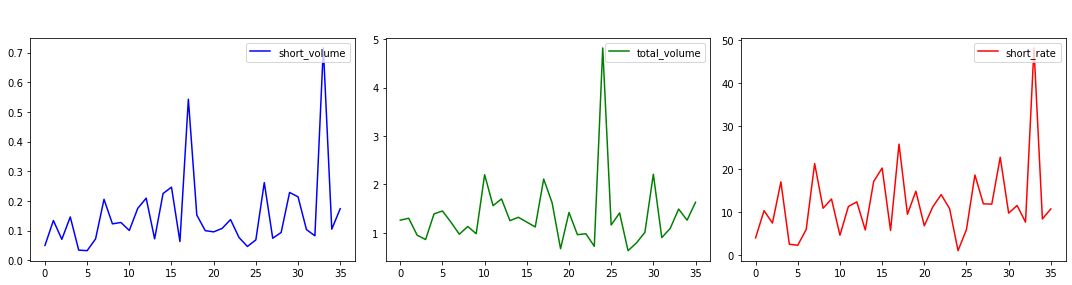

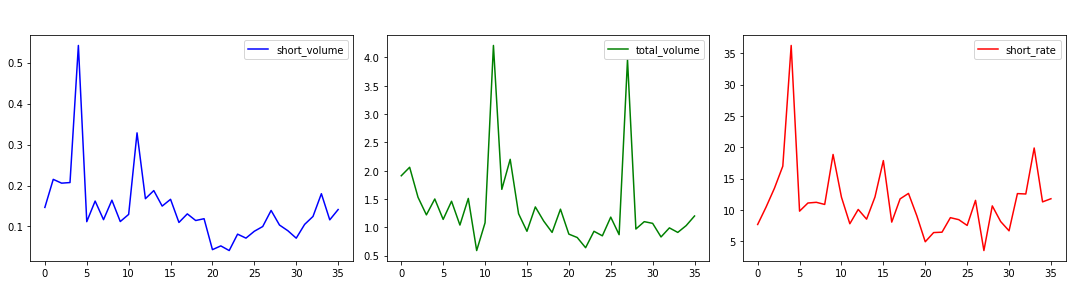

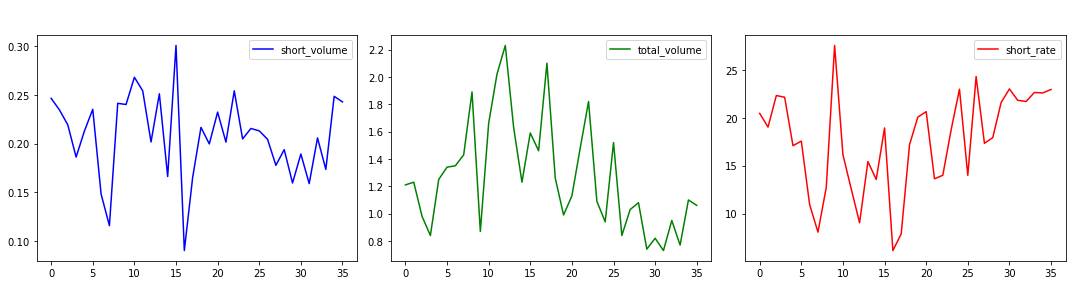

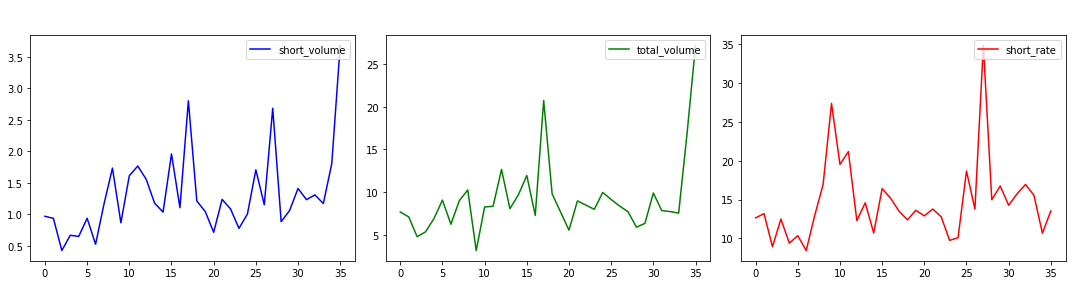

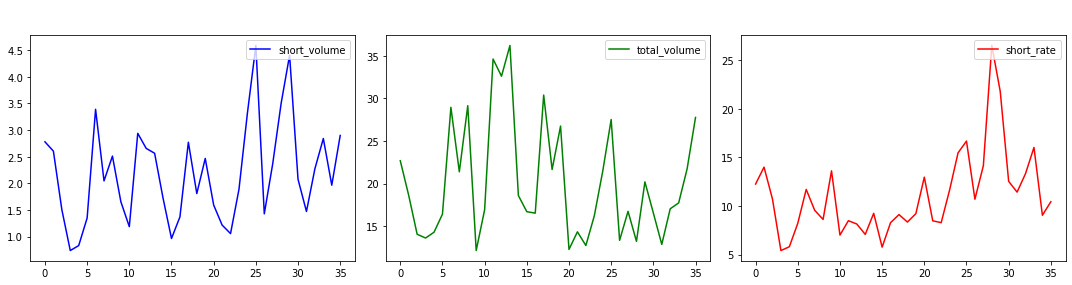

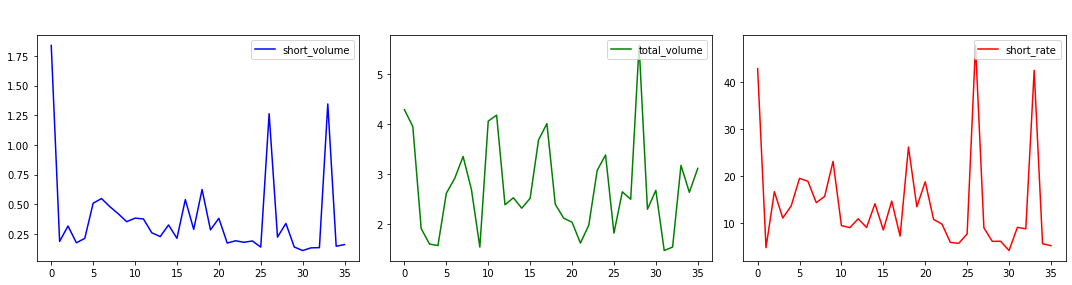

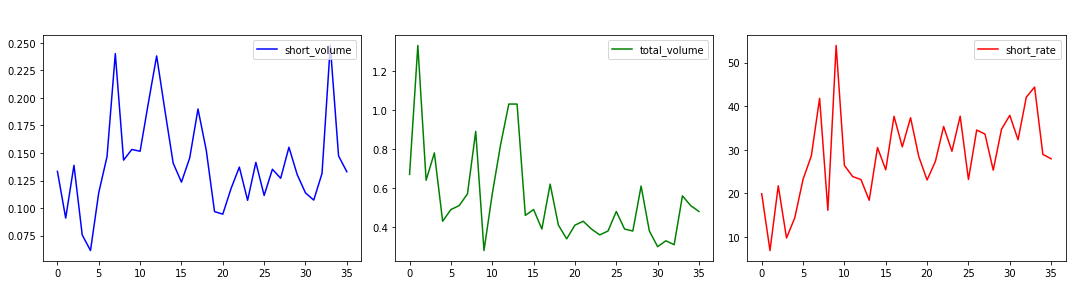

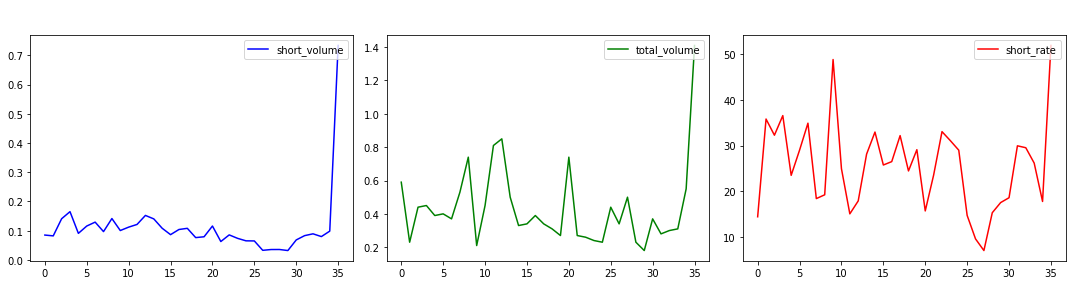

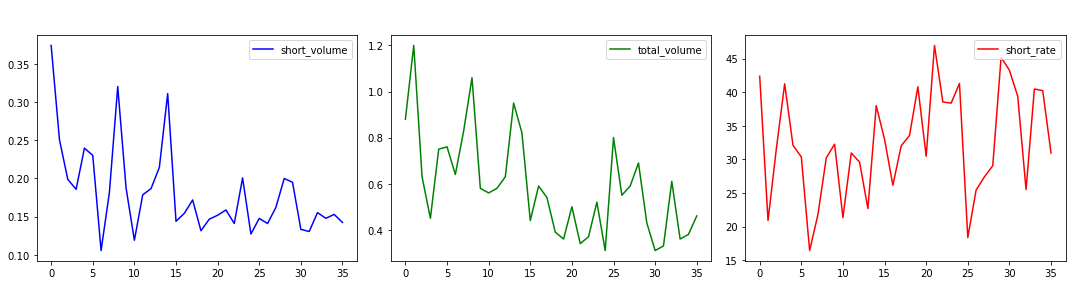

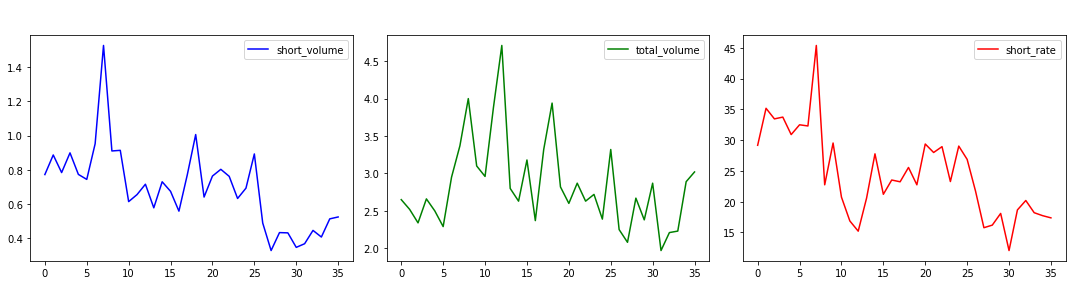

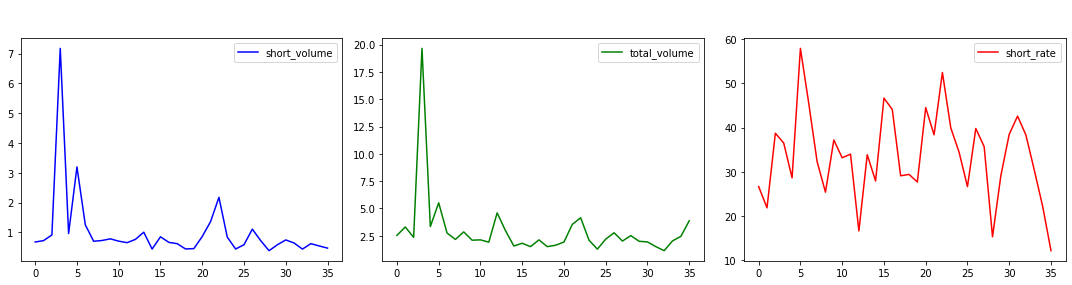

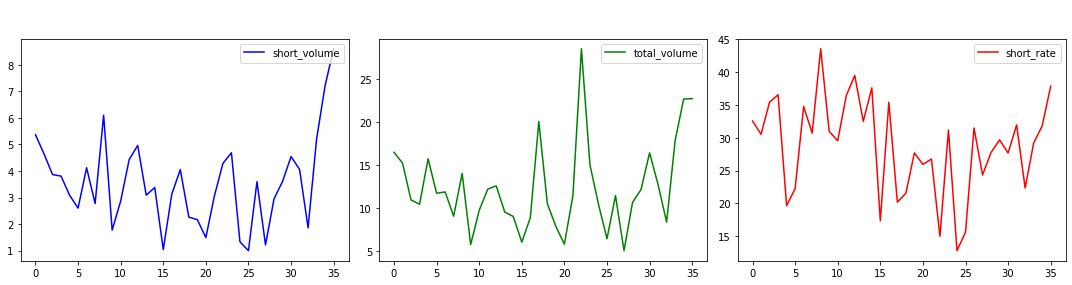

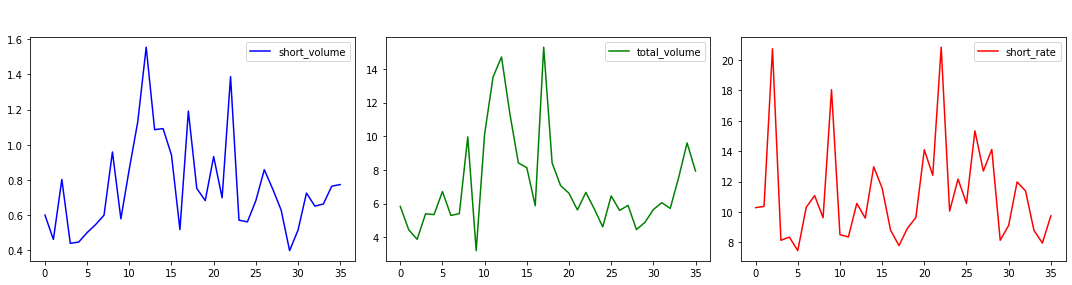

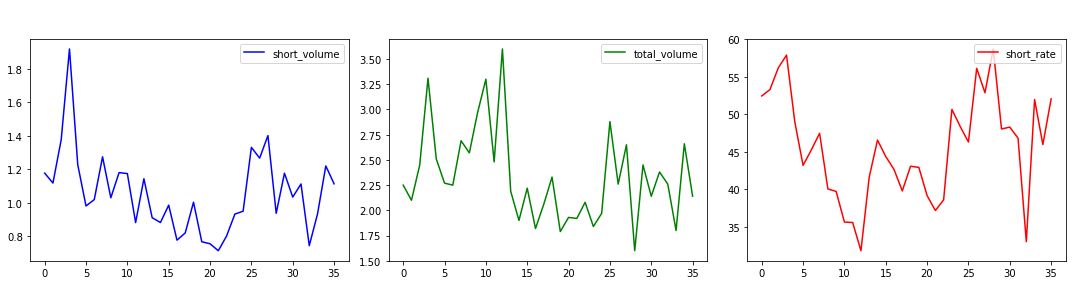

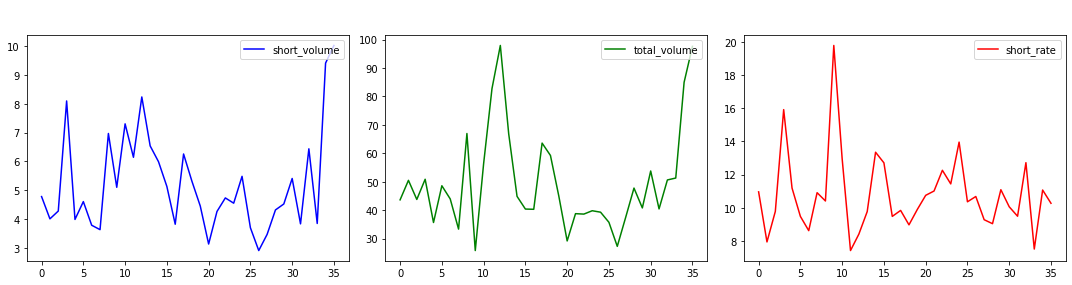

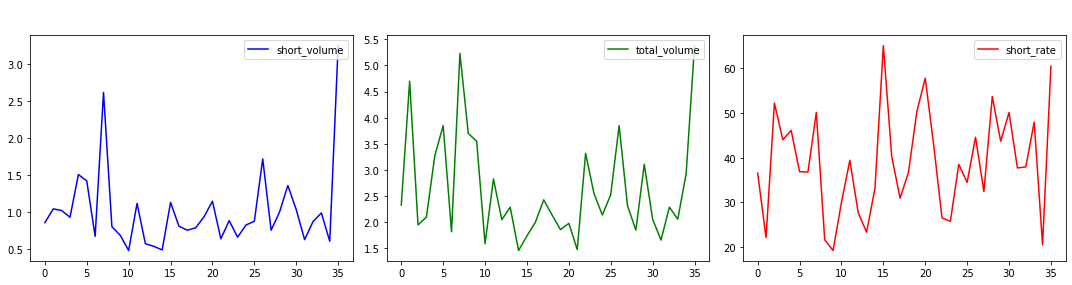

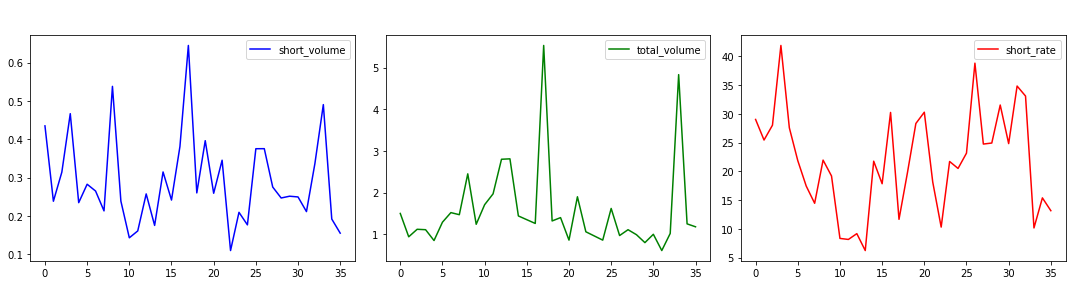

In [20]:
for i in li:
    data = pd.read_csv("../datas/etf_data/csv/"+ i +".csv",names=["time","short_volume","total_volume","short_rate"])
    data.sort_values('time',inplace=True)
    data.drop_duplicates(inplace=True)
    data["short_volume"] = data["short_volume"].map(f1) 
    fig = plt.figure(figsize=(15, 4))
    fig.suptitle(i,color="white")
    x = np.arange(len(data["time"]))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    y1 = data["short_volume"]
    y2 = data["total_volume"]
    y3 = data["short_rate"]
    c1,c2,c3 = "blue","green","red"
    l1,l2,l3 = "short_volume","total_volume","short_rate"
    ax1.plot(x, y1, color=c1, label=l1)
    ax2.plot(x, y2, color=c2, label=l2)
    ax3.plot(x, y3, color=c3, label=l3)
    ax1.legend(loc = 'upper right') 
    ax2.legend(loc = 'upper right') 
    ax3.legend(loc = 'upper right') 
    fig.tight_layout()              
    plt.show()
    fig.savefig("../datas/etf_data/pic/"+ i +".png")

In [21]:
import statistics
for i in li:
    df = pd.read_csv("../datas/etf_data/csv/"+ i +".csv",names=["time","short_volume","total_volume","short_rate"])
    df["short_volume"] = df["short_volume"].map(f1) 
    data = df.sort_values('time')
    rate = data["short_rate"].values
    mean = statistics.mean(rate)
    dev = statistics.pstdev(rate)
    now = rate[-1]
    if abs(now - mean) > dev:
        print(i,round(now,5),round(mean,5),round(now - mean,5))
    

SPY 18.78 14.638 4.142
VTI 34.48 28.78075 5.69925
QQQ 24.25 19.337 4.913
VTV 19.11 24.43175 -5.32175
IWM 16.76 13.30825 3.45175
VIG 22.94 17.14475 5.79525
VGT 51.91 25.813 26.097
VXUS 17.37 24.47 -7.1
VCIT 12.15 33.59925 -21.44925
LQD 37.85 28.5135 9.3365
BNDX 52.04 45.2635 6.7765
VCSH 60.47 38.90275 21.56725


In [22]:
for i in li:
    df = pd.read_csv("../datas/etf_data/csv/"+ i +".csv",names=["time","short_volume","total_volume","short_rate"])
    df["short_volume"] = df["short_volume"].map(f1) 
    data = df.sort_values('time')
    rate = data["short_rate"].values    
    rateDiv = [rate[i+1] - rate[i] for i in range(len(rate)-1)]
    meanDiv = statistics.mean(rateDiv)
    devDiv = statistics.pstdev(rateDiv)
    nowDiv = rateDiv[-1]
    if abs(nowDiv - meanDiv) > devDiv:
        print(i,round(nowDiv,5),round(meanDiv,5))

VTI 7.21 0.04615
VUG 18.51 0.13641
VGT 34.14 0.96128
BNDX 6.09 -0.01
VCSH 39.96 0.61308
